In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn
import numpy as np
import PIL

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras 

In [4]:
from PIL import Image

s1 = Image.open("/content/download (1).jpeg")
s2 = Image.open("/content/download.jpeg")
s3 = Image.open("/content/images.jpeg")


In [5]:
s1 = np.array(s1.resize((100,100)).convert("L"))
s2 = np.array(s2.resize((100,100)).convert("L"))
s3 = np.array(s3.resize((100,100)).convert("L"))

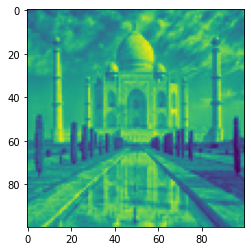

In [6]:
plt.imshow(s1)

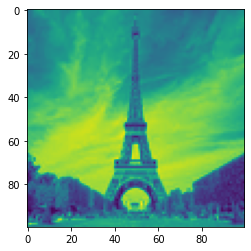

In [7]:
plt.imshow(s2)

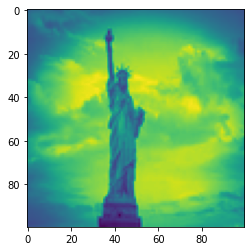

In [8]:
plt.imshow(s3)

In [9]:
s1,s2,s3 = s1.reshape(1,100,100) ,s2.reshape(1,100,100),s3.reshape(1,100,100)

In [10]:
s = np.concatenate([s1,s2,s3],axis = 0)

In [11]:
s.shape

(3, 100, 100)

In [12]:
s_lin = s.reshape(3,-1)

In [13]:
s_lin = np.array(s_lin).astype('float64').reshape(-1,3)
s_lin.shape

(10000, 3)

In [14]:
s_lin /= s_lin.std(axis=0)

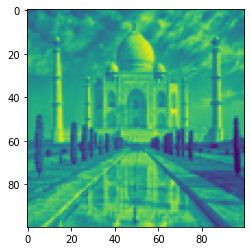

In [15]:
plt.imshow(s_lin.reshape(3,-1)[0].reshape(100,100))

In [16]:
A = np.array([[1, 1, 1,1,1,1], [0.5, 2, 1.0,2.0,1.1,1.2], [1.5, 1.0, 2.0,1.2,1,0.9]])  # Mixing matrix
# A = np.random.rand(3,6)*20
X = np.dot(s_lin, A)  # Generate observations

X /= X.std(axis=0)

In [17]:
X.shape

(10000, 6)

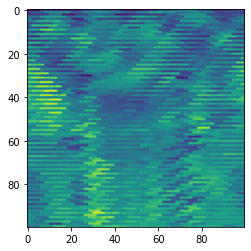

In [18]:
plt.imshow(X.reshape(6,-1)[0].reshape(100,100))

In [20]:
np_sig = lambda x : 1/(1+(np.exp(-x)))

numpy implementation ...........


---------------------------------


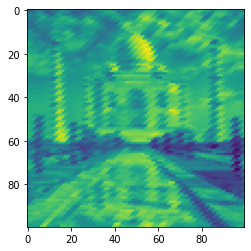

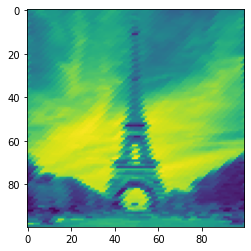

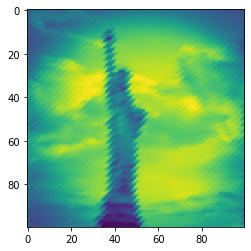

---------------------------------


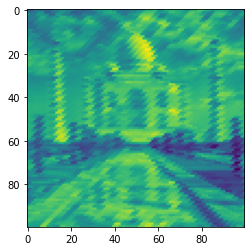

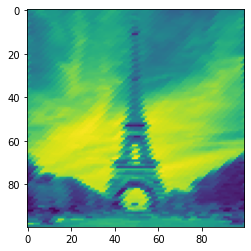

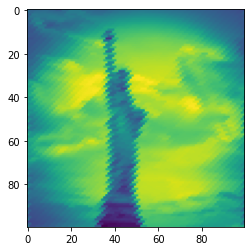

---------------------------------


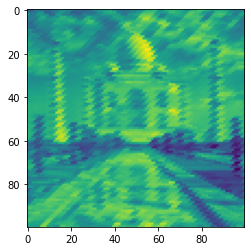

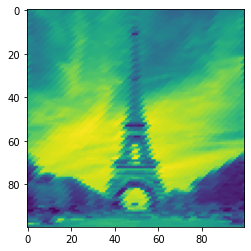

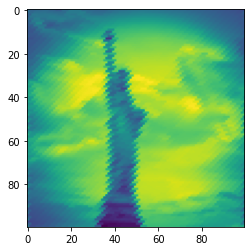

---------------------------------


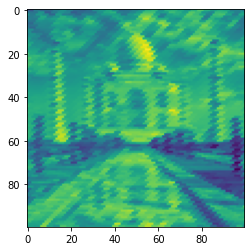

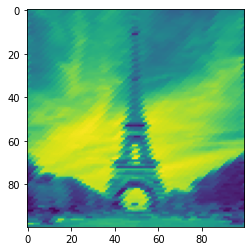

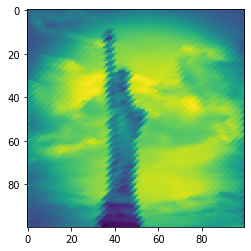

---------------------------------


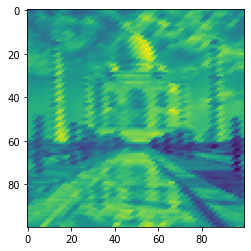

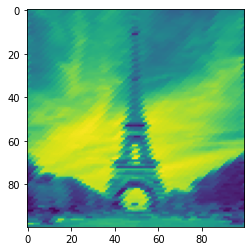

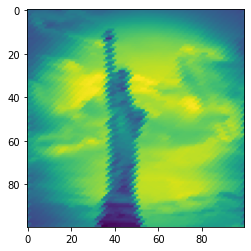

---------------------------------


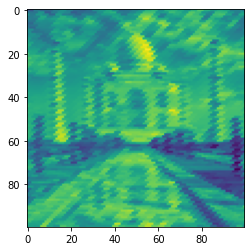

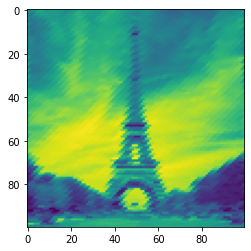

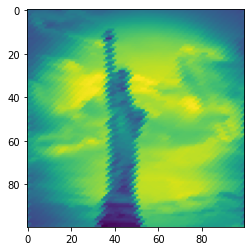

---------------------------------


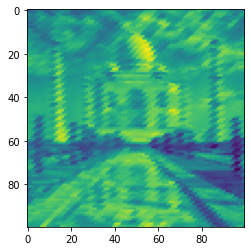

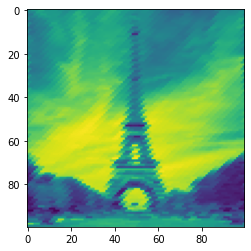

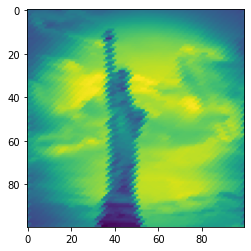

---------------------------------


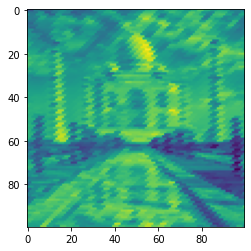

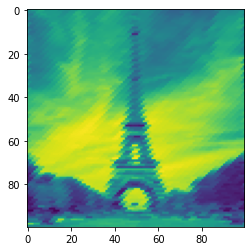

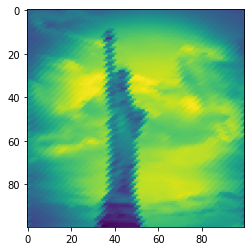

---------------------------------


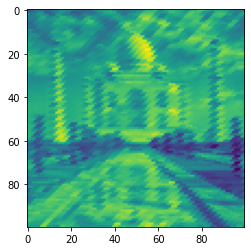

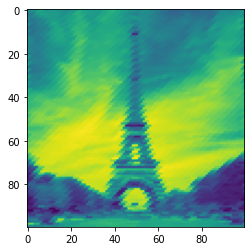

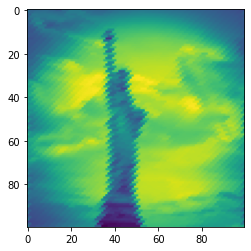

---------------------------------


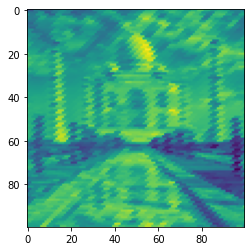

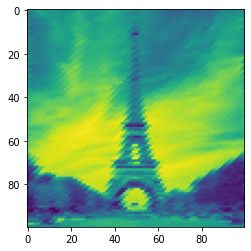

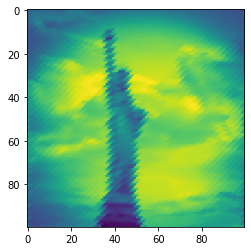

In [21]:
#andrew NG's Method
num_epochs = 2000
w_sig = np.random.randn(6,3)
learning_rate = 0.00009
X = X.reshape(-1,6)
for iter in range(num_epochs):
  temp = np_sig(np.dot(X,w_sig))
  temp = 1-2*temp
  w_sig = w_sig + learning_rate*(np.linalg.pinv(w_sig @ w_sig.T) @ w_sig + np.dot(X.T,temp))
  if iter%200 == 0:
    print('---------------------------------')
    S_sig_grad = np.dot(X,w_sig)
    S_sig_grad /= S_sig_grad.std(axis=0)
    plt.imshow(S_sig_grad.reshape(3,-1)[0].reshape(100,100))
    plt.show()
    plt.imshow(S_sig_grad.reshape(3,-1)[1].reshape(100,100))
    plt.show()
    plt.imshow(S_sig_grad.reshape(3,-1)[2].reshape(100,100))
    plt.show()




torch implementation of the same .........
lets try

---------------------------------


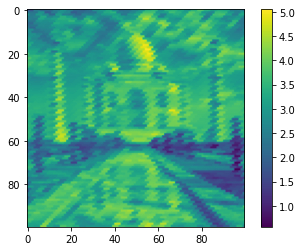

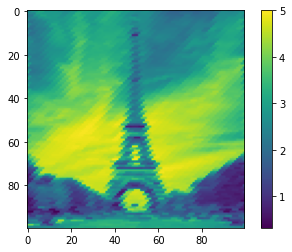

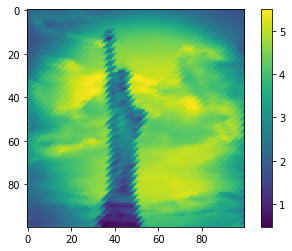

---------------------------------


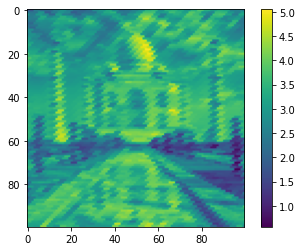

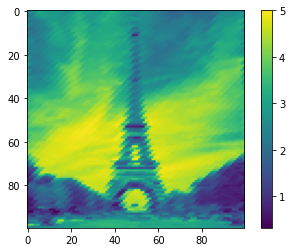

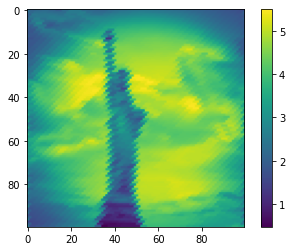

---------------------------------


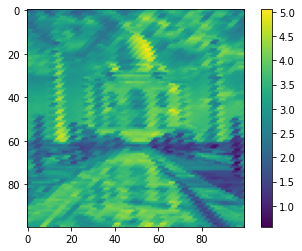

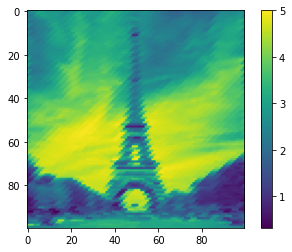

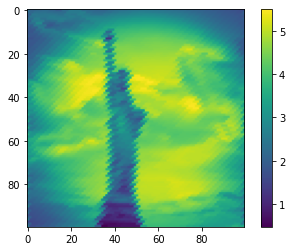

---------------------------------


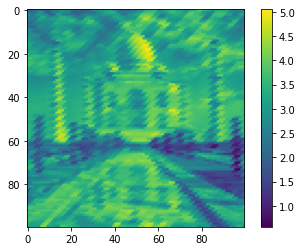

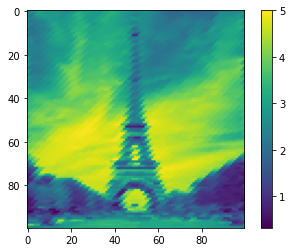

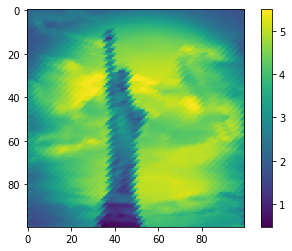

---------------------------------


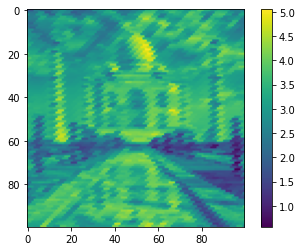

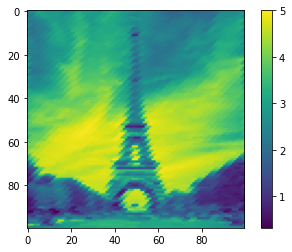

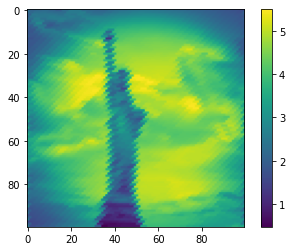

---------------------------------


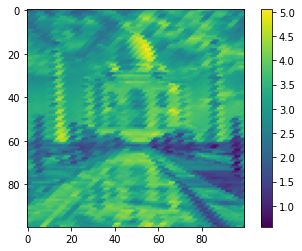

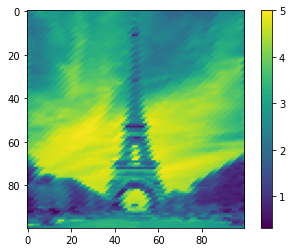

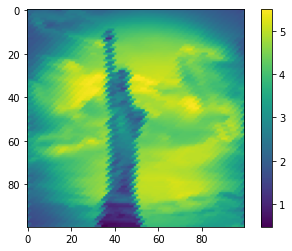

---------------------------------


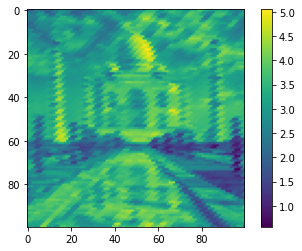

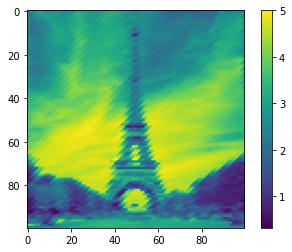

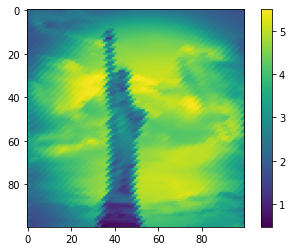

---------------------------------


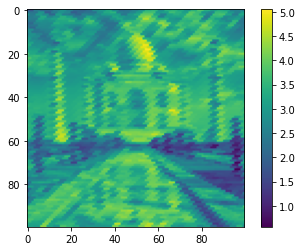

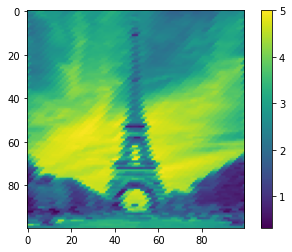

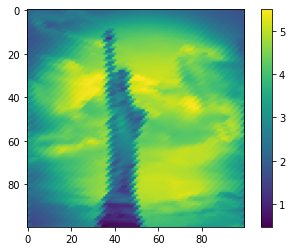

---------------------------------


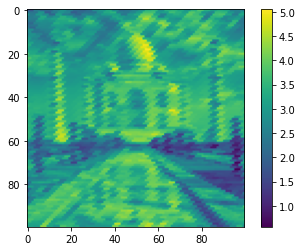

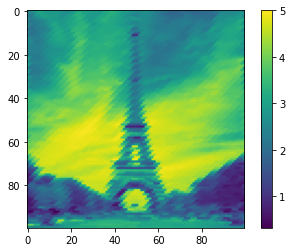

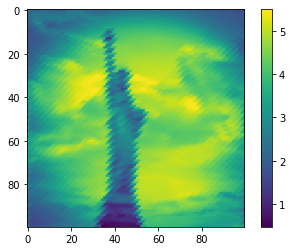

---------------------------------


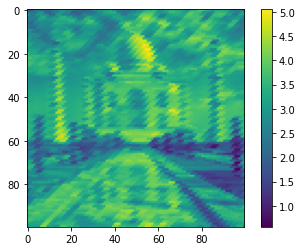

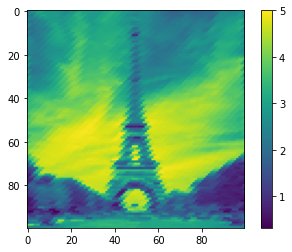

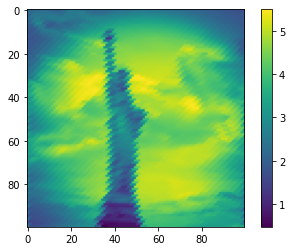

In [23]:
A = np.array([[1, 1, 1,1,1,1], [0.5, 2, 1.0,2.0,1.1,1.2], [1.5, 1.0, 2.0,1.2,1,0.9]])  # Mixing matrix
# A = np.random.randn(3,6)
X = np.dot(s_lin, A)  # Generate observations

X /= X.std(axis=0)




#andrew NG's Method
num_epochs = 2000
w_sig = torch.randn(6,3)
learning_rate = 0.0009
X = torch.FloatTensor(X)
X = X.reshape(-1,6)
for iter in range(num_epochs):
  temp = torch.sigmoid(X @ w_sig)
  temp = 1-2*temp
  w_sig = w_sig + learning_rate*(torch.linalg.pinv(w_sig @ w_sig.T) @ w_sig + X.T@temp)
  if iter%200 == 0:
    print('---------------------------------')
    S_sig_grad = X @ w_sig
    S_sig_grad /= S_sig_grad.std(axis=0)
    plt.imshow(S_sig_grad.reshape(3,-1)[0].reshape(100,100))
    plt.colorbar()
    plt.show()
    plt.imshow(S_sig_grad.reshape(3,-1)[1].reshape(100,100))
    plt.colorbar()
    plt.show()
    plt.imshow(S_sig_grad.reshape(3,-1)[2].reshape(100,100))
    plt.colorbar()
    plt.show()




how much order matters ............... 
lets check

In [27]:
s_ones = X @ torch.randn(6,3)

In [28]:
s_ones.shape

torch.Size([10000, 3])

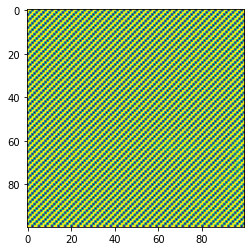

In [29]:
plt.imshow(torch.sigmoid(s_ones.reshape(3,-1)[0].reshape(100,100)))

lets try with gradient descent updating the MLE of the ICA

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [109]:
def g_grad(x):
    sig = torch.sigmoid(x)
    return (sig*(1-sig))

class NN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        w_sig = torch.randn(6,3)
        self.w = torch.nn.parameter.Parameter(w_sig)
        
    def forward(self,x):
        der_sigmoid = g_grad(x @ self.w)
        return der_sigmoid
    
def criterion(w,der_sigmoid):
  det = torch.det(w @ w.T)
  return -(torch.mean(torch.log(der_sigmoid)) + torch.log(abs(det)))

In [110]:
from torch.optim import Adam

In [120]:
model = NN()

In [121]:
X.shape

torch.Size([10000, 6])

-----------------------
tensor(46.4273, grad_fn=<NegBackward0>)
-----------------------


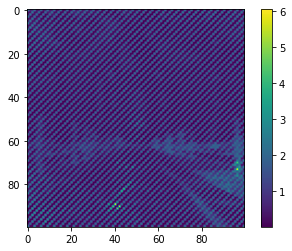

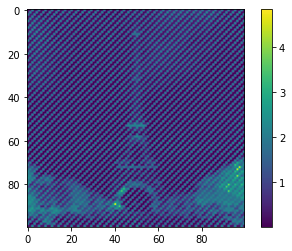

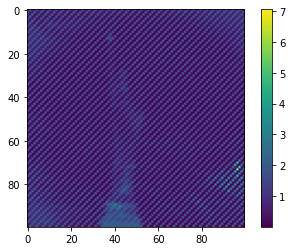

-----------------------
tensor(45.4826, grad_fn=<NegBackward0>)
-----------------------


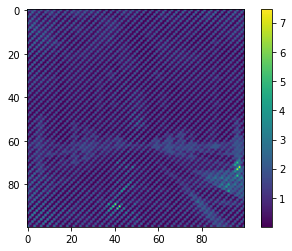

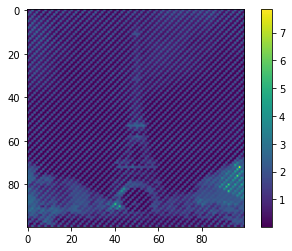

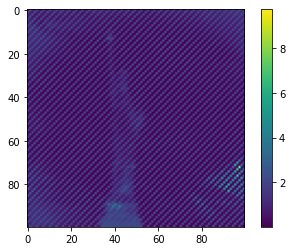

-----------------------
tensor(46.7137, grad_fn=<NegBackward0>)
-----------------------


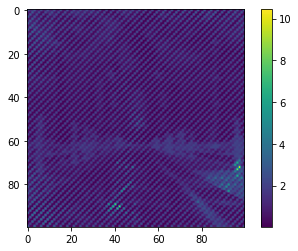

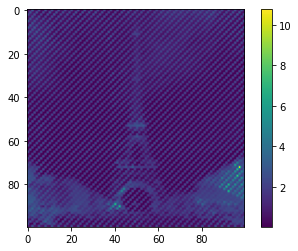

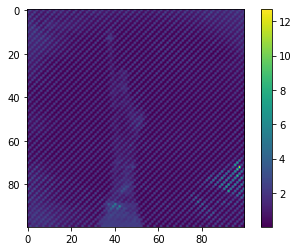

-----------------------
tensor(44.2965, grad_fn=<NegBackward0>)
-----------------------


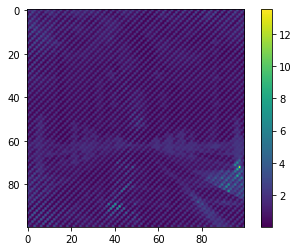

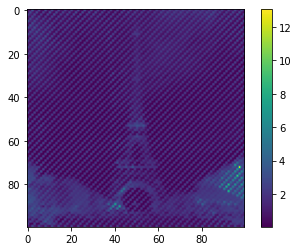

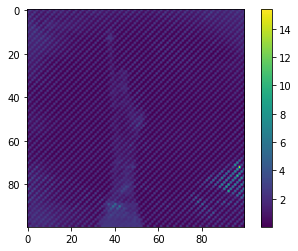

-----------------------
tensor(43.9689, grad_fn=<NegBackward0>)
-----------------------


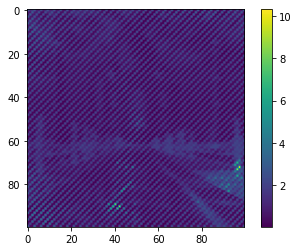

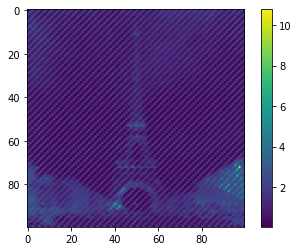

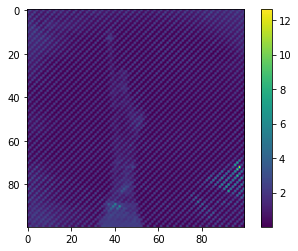

-----------------------
tensor(44.8553, grad_fn=<NegBackward0>)
-----------------------


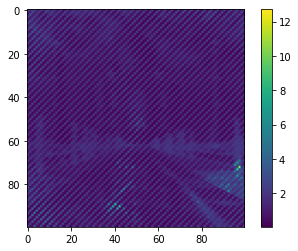

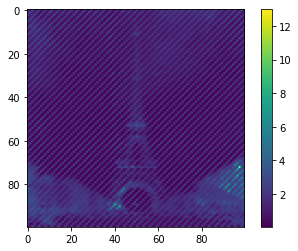

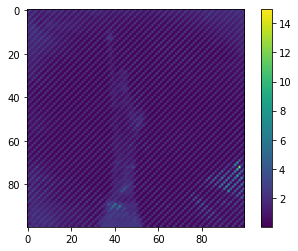

-----------------------
tensor(46.3398, grad_fn=<NegBackward0>)
-----------------------


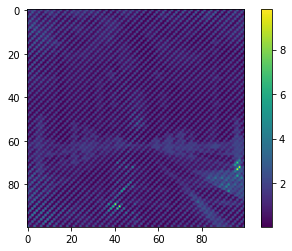

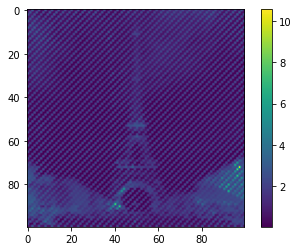

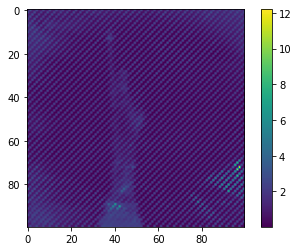

-----------------------
tensor(44.7640, grad_fn=<NegBackward0>)
-----------------------


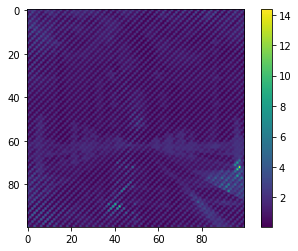

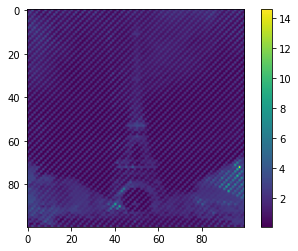

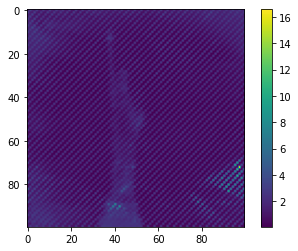

-----------------------
tensor(44.6099, grad_fn=<NegBackward0>)
-----------------------


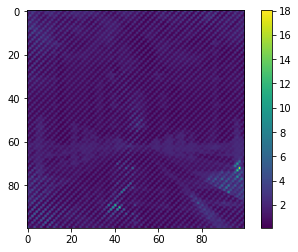

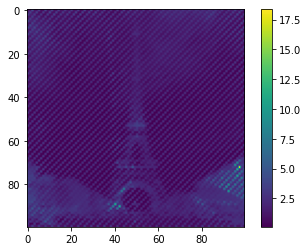

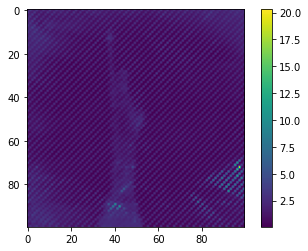

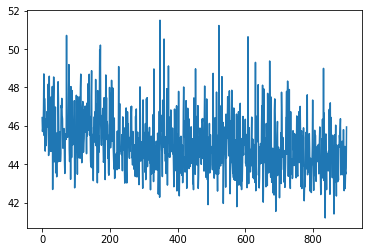

In [122]:
optimizer = Adam(model.parameters(),lr =0.003)
loss_list = []
epochs = 900
torch.autograd.set_detect_anomaly(True)
for i in range(epochs):
    y = model.forward(X)
    y_ = y/y.std(axis = 0)
    loss = criterion(model.w,y_)
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
    if i%100 == 0: 
        with torch.no_grad():
            un_mix = model.forward(X)
            un_mix = un_mix.numpy().reshape(3,-1)
            un_mix /= un_mix.std(axis = 0)
            # print(un_mix)
            print("-----------------------")
            print(loss)
            print("-----------------------")
            un_mix = un_mix.reshape(3,-1)
            plt.imshow(un_mix[0].reshape(100,100))
            plt.colorbar()
            plt.show()
            plt.imshow(un_mix[1].reshape(100,100))
            plt.colorbar()
            plt.show()
            plt.imshow(un_mix[2].reshape(100,100))
            plt.colorbar()
            plt.show()


plt.plot(loss_list)

-----------------------
tensor(45.9394, grad_fn=<NegBackward0>)
-----------------------


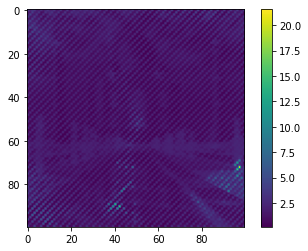

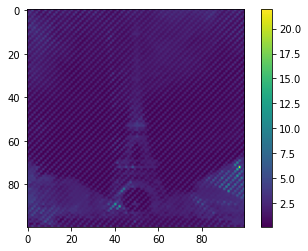

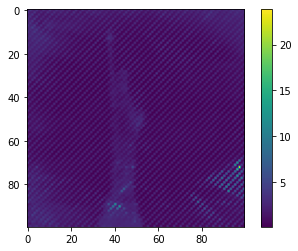

In [125]:
with torch.no_grad():
            un_mix = model.forward(X)
            # un_mix = torch.sigmoid(un_mix)
            un_mix = un_mix.numpy().reshape(3,-1)
            un_mix /= un_mix.std(axis = 0)
            # print(un_mix)
            print("-----------------------")
            print(loss)
            print("-----------------------")
            un_mix = un_mix.reshape(3,-1)
            plt.imshow(un_mix[0].reshape(100,100))
            plt.colorbar()
            plt.show()
            plt.imshow(un_mix[1].reshape(100,100))
            plt.colorbar()
            plt.show()
            plt.imshow(un_mix[2].reshape(100,100))
            plt.colorbar()
            plt.show()

In [39]:
torch.det(s)

tensor(-1.0656, grad_fn=<LinalgDetBackward0>)